# 크롤링한 뉴닉 데이터 분석

In [ ]:
!nvidia-smi

Wed Oct 13 06:00:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모듈 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt

# read csv to pandas dataframe
first = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211002_onlylink.csv")
sample_1 = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_sample.csv")
sample_2 = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_sample_v2.csv")
train = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211010_full.csv")
test = pd.read_csv("/content/drive/MyDrive/data/newneek/dacon_train.csv")

In [ ]:
print(first.shape)
print(sample_1.shape)
print(sample_2.shape)
print(train.shape)
print(test.shape)

(2821, 6)
(44, 7)
(926, 7)
(2837, 7)
(87075, 2)


In [ ]:
test = test[-100:]

In [ ]:
display(first)

,기사id,카테고리,제목,날짜,요약문,원문
0,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"미국은 가까이 중국은 멀리: 미국과 계속 친하게 지내고, 중국을 견제하는 데 신경 ...",https://www.yna.co.kr/view/AKR20210929177100083
1,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,당장 크게 달라지긴 어려울 것 같아요. 아베 전 총리보다는 갈등을 잘 안 만들려는 ...,https://www.yna.co.kr/view/AKR2021092911590050...
2,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"\n그는 2015년 외무상을 할 때, 박근혜 정부와 맺은 ‘한일 위안부합의’를 이끌...",https://terms.naver.com/entry.naver?docId=5144...
3,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,“백신 인증서 없으세요? 그럼 못 들어오세요.” 식당 들어갈 때 이런 말을 듣는다면...,https://go.seoul.co.kr/news/newsView.php?id=20...
4,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,맞아요. 그래서 반대하는 목소리도 있어요 🤔.,https://www.hankookilbo.com/News/Read/A2021092...
...,...,...,...,...,...,...
2816,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,과연 아시아계 미국인들은 '공정하게' 뽑히고 있던 걸까요? 🙄 하버드 대학교의 아시...,https://www.reuters.com/article/us-harvard-adm...
2817,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"이번 판은 하버드의 승! 5년 만의 판결에서, 하버드가 일부러 차별한 건 아니라는 ...",https://www.nytimes.com/2018/06/15/us/harvard-...
2818,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"+ 🙅 “아시아인들을 이용하지 마!” 처음 SFFA가 소송을 시작했을 때, 하버드의...",https://news.joins.com/article/11775777
2819,848,세계,가짜뉴스 가만두면 가만 안 둔다!,2019/10/04,"며칠 전, 싱가포르 양치기가 블로그에 공유한 뉴스: 늑대가 나타났다! 다음 날 자고...",https://www.yna.co.kr/view/AKR20191002086700076


In [ ]:
display(train)

,id,category,title,date,summary,original_text,url
0,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"모기가 옮기는 기생충질환으로 🦟, 감염되면 심한 오한이 들고 열이 나요. 옛날에는 ...",NaN,https://terms.naver.com/entry.naver?cid=51004&...
1,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"이유는 말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보...",2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는...,https://www.hani.co.kr/arti/international/inte...
2,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,WHO가 인정했으니 이제 전 세계에 백신을 공급하면 되는데요. 시간은 꽤 걸릴 것 ...,이재영 기자 기자 페이지 1987년 개발된 최초 백신…인류난제 극복 역사적 첫발 한...,https://www.yna.co.kr/view/AKR20211007003551088
3,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,웬만한 제품이나 부품은 중국에서 만들잖아요(=중국 별명 ‘세계의 공장’ 🏭). 만드...,viewer 중국 랴오닝성 선양에 있는 한 석탄화력 발전소의 굴뚝에서 연기가 솟아오...,https://www.sedaily.com/NewsVIew/22SLJJUOUR
4,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,중국은 호주랑 한바탕 싸우면서 ‘너네 석탄 안 사!’ 했어요. 호주가 석탄 수출해서...,전력난으로 중국 남부 광둥성 제조업 거점인 둥관 산업단지에 있는 한 공장에 불이 꺼...,https://www.joongang.co.kr/article/25011772#home
...,...,...,...,...,...,...,...
2832,1065,경제,코드명 스튜어드십코드🕵,2019/02/11,국민연금이 거기 왜 끼는데?😮국민연금은 국민의 노후를 보장하기 위해서 주식으로도 돈...,"◆ 국민연금, 한진칼 경영참여 ◆ 박능후 보건복지부 장관(맨 오른쪽)이 1일 오...",https://www.mk.co.kr/news/economy/view/2019/02...
2833,1065,경제,코드명 스튜어드십코드🕵,2019/02/11,+ 스튜어드십코드를 바라보는 또다른 관점 : 정치적인 이유로 국민연금의 스튜어드십코...,NaN,http://www.munhwa.com/news/view.html?no=201902...
2834,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"누가 그를 죽이라고 시켰는데?외신에 따르면, 사우디아라비아 빈살만 왕세자가 시킨 일...",NaN,https://www.washingtonpost.com/world/national-...
2835,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"+ 하지만 그러기엔 애플워치와 아이폰의 거리가 너무 멀었다며, 사실은 터키 정부가 ...",NaN,https://qz.com/1423401/jamal-khashoggi-the-pla...


In [ ]:
test.head()

,article_original,abstractive
86975,"벤처업계가 52시간 근로제와 관련, 탄력적 근로시간 정산 기간을 기존 3개월에서 1...",벤처업계는 법정 근로시간 관련 법률 개정은 자율적인 벤처기업 문화를 훼손할 우려가 ...
86976,백승현 기자 류장수 최저임금위원회 위원장이 최저임금 결정체계 개편이 지난해에 공식화...,최저임금 결정체계 개편이 지난해에 공식화되었음에도 불구하고 국회가 입법을 하지 않자...
86977,르노삼성자동차 직원 사이에서 이런 탄식이 이어지고 있다. 직원들의 우려대로 르노삼성...,직원들의 우려대로 르노삼성은 올해 1분기에 2015년 이후 최악의 판매량으로 떨어졌...
86978,"배태웅 기자 미국에서 헬스베리티, 베릴리 같은 업체가 나올 있는 배경은 개인정보보호...",미국에는 개인정보보호 제도의 기본 원칙이 '사후 동의'이기 때문에 다양한 개인정보가...
86979,박용만 대한상공회의소 회장은 1일 서울 태평로 한국프레스센터에서 열린 여기자 포럼 ...,박용만 대한상공회의소 회장은 1일 열린 '최근 경제진단과 양해 현안' 강연에서 규제...


In [ ]:
train.isnull().sum()

id                  0
category          423
title               0
date                0
summary             0
original_text    1024
url                 0
dtype: int64

In [ ]:
# 결측치 처리
train['category'].fillna(0, inplace = True)
train.dropna(inplace = True)

In [ ]:
# 텍스트 전처리
# 이모지 없애기
!pip install emoji

import emoji
import re

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def preprocess_text(text):
    text = text.replace(u'\xa0', u' ')  # html 전처리
    email = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # email 전처리
    text = re.sub(pattern=email, repl=" ", string=text)
    return text

train['title'] = train['title'].apply(give_emoji_free_text)
train['title'] = train['title'].apply(preprocess_text)
train['summary'] = train['summary'].apply(give_emoji_free_text)
train['summary'] = train['summary'].apply(preprocess_text)
train['original_text'] = train['original_text'].apply(preprocess_text)

In [ ]:
train['original_text'][1]

'2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는 아이들을 데리고 순서를 기다리고 했다. AP 연합뉴스 세계보건기구(WHO)가 최초로 말라리아 백신 사용을 승인했다. 열대지방을 중심으로 많은 어린이들 목숨을 앗아가는 말라리아에 대한 백신 보급이 연간 수십만명을 살릴 수 있을지 기대된다. <에이피>(AP) 통신은 테워드로스 아드하놈 거브러여수스 세계보건기구 사무총장이 6일 기자회견에서 말라리아 백신 RTS,S의 아프리카 3개국 시범 접종사업이 성공적이었다며 이 백신에 대한 승인을 발표했다고 보도했다. 거브러여수스 사무총장은 “난 말라리아 연구자였으며, 이 오래되고 악랄한 질병에 효과적인 백신을 가질 날을 고대해왔다”며 “오늘은 역사적인 날이다. 세계보건기구는 세계 최초 말라리아 백신의 광범위한 사용을 권장한다”고 말했다. 모스퀴릭스(Mosquirix)로도 불리는 RTS,S 백신은 영국 제약사 글락소스미스클라인이 개발한 제품으로 2019년 시작한 시범 접종사업에서 가나, 케냐, 말라위 어린이 약 80만명에게 접종됐다. 이 사업에서 백신의 말라리아 예방률은 39%, 중증 예방률은 29%로 그리 높지 않은 것으로 나타났다. 하지만 이 백신과 말라리아 치료제를 함께 복용하면 입원율과 사망률이 70% 감소하는 것으로 나타났다. 현재 통용되는 항말라리아제는 예방 목적으로도 사용된다. 거브러여수스 사무총장은 “현존하는 말라리아 예방 수단과 이 백신을 함께 사용하면 매년 수만명의 어린 목숨을 구할 수 있을 것”이라고 했다. 모기가 옮기는 기생충이 증식을 위해 인간 혈액세포를 파괴하는 말라리아는 인류를 괴롭혀온 대표적 질병이다. 이 질병으로 2019년에 40만9천명이 숨졌으며, 이 중 5살 미만이 27만명이다. 그해에 세계적으로 2억2900만건이 발병했는데 94%가 아프리카에서 발생했다. 지난 100년 동안 백신 개발 노력이 이어졌는데도 결과가 더디게 나온 배경에는 박멸이 어려운 말라리아의 특성이 있다. 전문가들은 말라리아는 기생충이 주범이기

In [ ]:
train[['id', 'category']].groupby(['category']).count()

,id
category,
0,252
경제,203
국내정치,349
노동·일,91
세계,490
여성,63
코로나19,198
테크,73
피자스테이션,25


In [ ]:
ref = []
for x in train['url']:
    try: ref.append(x.split('/')[2])
    except: ref.append('NULL')

In [ ]:
train['ref'] = ref
ref_df = train[['id', 'ref']].groupby(['ref']).count()

In [ ]:
display(ref_df)

,id
ref,
biz.chosun.com,42
imnews.imbc.com,10
news.jtbc.joins.com,35
news.kbs.co.kr,67
news.mt.co.kr,47
news.sbs.co.kr,80
newsis.com,71
www.chosun.com,86
www.donga.com,71


<Figure size 1440x1440 with 0 Axes>

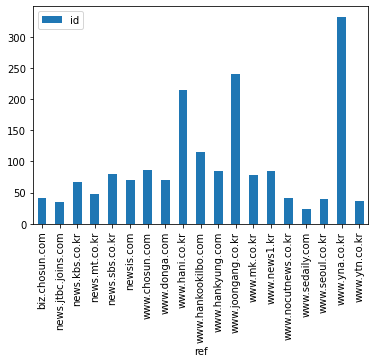

In [ ]:
plt.figure(figsize=(20,20))
over_15 = ref_df[ref_df['id']>15]
over_15.plot(kind='bar')

In [ ]:
train['length'] = [len(str(x)) for x in train['original_text']]

In [ ]:
display(full)

,id,category,title,date,summary,original_text,url,ref,length
1,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"이유는 말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보...",2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는...,https://www.hani.co.kr/arti/international/inte...,www.hani.co.kr,1178
2,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,WHO가 인정했으니 이제 전 세계에 백신을 공급하면 되는데요. 시간은 꽤 걸릴 것 ...,이재영 기자 기자 페이지 1987년 개발된 최초 백신…인류난제 극복 역사적 첫발 한...,https://www.yna.co.kr/view/AKR20211007003551088,www.yna.co.kr,2284
3,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,웬만한 제품이나 부품은 중국에서 만들잖아요(=중국 별명 ‘세계의 공장’ ). 만드는...,viewer 중국 랴오닝성 선양에 있는 한 석탄화력 발전소의 굴뚝에서 연기가 솟아오...,https://www.sedaily.com/NewsVIew/22SLJJUOUR,www.sedaily.com,1269
4,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,중국은 호주랑 한바탕 싸우면서 ‘너네 석탄 안 사!’ 했어요. 호주가 석탄 수출해서...,전력난으로 중국 남부 광둥성 제조업 거점인 둥관 산업단지에 있는 한 공장에 불이 꺼...,https://www.joongang.co.kr/article/25011772#home,www.joongang.co.kr,3082
7,2,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 지금까지 한국 콘텐츠에 투자를 많이 해왔어요. 우리나라에 진출한 2016...,"오징어게임 스틸컷. /사진=넷플릭스 ""넷플릭스를 통해 한국의 콘텐츠는 말 그대로 전...",https://news.mt.co.kr/mtview.php?no=2021092913...,news.mt.co.kr,2838
...,...,...,...,...,...,...,...,...,...
2826,1026,세계,파리의 심장이 불탔다,2019/04/17,지금은 불이 꺼졌나?오후 7시쯤 시작된 불길은 지붕의 2/3를 태우고 첨탑까지 무너...,"성혜미 기자 기자 페이지 ""센 강이 바로 옆인데""…목재 구조물, 소방 시스템 미비도...",https://www.yna.co.kr/view/AKR2019041608420000...,www.yna.co.kr,1481
2828,1037,0,제주 4·3 사건 72주기,2019/04/03,국방부가 72년 만에 ‘제주 4·3사건’ 희생자들에게 애도를 표한대요.,국방부가 군·경의 무력 진압으로 수많은 양민이 희생된 '제주 4·3사건'에 대해 사...,https://news.jtbc.joins.com/article/article.as...,news.jtbc.joins.com,819
2830,1037,0,제주 4·3 사건 72주기,2019/04/03,50년이 지나도록 진상규명이 이루어지지 않았었는데요. 2000년에야 정부 차원의 진...,노무현 전 대통령과 문재인 대통령. 문재인 대통령이 3일 제주 4·3사건 70주년 ...,https://www.hani.co.kr/arti/politics/politics_...,www.hani.co.kr,276
2831,1037,0,제주 4·3 사건 72주기,2019/04/03,"+ 매해 4월 3일 전후에는 정치권에서 특별법 통과를 약속하는 사람들은 많지만, 진...",제주4·3유족회가 지난달 10일 제주시 관덕정 앞 광장에서 기자회견을 열고 제주4·...,https://www.hani.co.kr/arti/society/area/88823...,www.hani.co.kr,535


In [ ]:
# Mecab
%%capture
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141816 sha256=7efeed45589062dd83c86d06d7f34bd40a4d53b9d362c6e1292fa4487af41cb4
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import random
import math
import copy
import gc
from tqdm import tqdm
from glob import glob
from konlpy.tag import Mecab

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
encoder_len = 1000   # 1000 설정
decoder_len = 100   # 요약문 길이 100
max_vocab_size = 20000
batch_size = 8
num_layers = 6
d_model = 512
dff = 2048
num_heads = 8
dropout_rate = 0.1
epochs = 10
learning_rate = 1e-4
device = torch.device("cuda:0")

# 토크나이징

In [ ]:
class Mecab_Tokenizer():
    def __init__(self, max_length, mode, max_vocab_size=-1):
        self.text_tokenizer = Mecab()
        self.mode = mode
        self.txt2idx = {'pad_':0, 'unk_':1}
        self.idx2txt = {0:'pad_', 1:'unk_'}
        self.max_length = max_length
        self.word_count = {}
        self.max_vocab_size = max_vocab_size
        
        # 띄어쓰기를 찾기 위한 태그 목록
        self.font_blank_tag = [
            '', 'EC', 'EC+JKO', 'EF', 'EP+EC', 'EP+EP+EC', 'EP+ETM', 'EP+ETN+JKO', 'ETM', 'ETN', 'ETN+JKO', 'ETN+JX', 'IC', 'JC', 'JKB', 'JKB+JX', 'JKO',
            'JKQ', 'JKS', 'JX', 'MAG', 'MAG+JX', 'MAG+XSV+EP+EC', 'MAJ','MM', 'MM+EC', 'NNB', 'NNB+JKB', 'NNB+JKO', 'NNB+VCP+EC', 'NNBC', 'NNG', 'NNG+JX+JKO',
            'NNG+VCP+EC', 'NNP', 'NNP+JX', 'NP', 'NP+JKO', 'NP+JKS', 'NP+JX', 'NP+VCP+EC', 'NR', 'SC', 'SF', 'SL', 'SN', 'SSC', 'SSO', 'SY', 'UNKNOWN',
            'VA+EC', 'VA+EC+VX+ETM', 'VA+ETM', 'VA+ETN+JKB+JX', 'VCN+EC', 'VCN+ETM', 'VCP', 'VCP+EC', 'VCP+EP+EC', 'VCP+EP+ETM', 'VCP+ETM', 'VCP+ETN',
            'VV+EC', 'VV+EC+JX', 'VV+EC+VX+EC', 'VV+EC+VX+ETM', 'VV+EP+EC', 'VV+EP+ETM', 'VV+ETM', 'VV+ETN', 'VX+EC', 'VX+EC+VX+EP+EC', 'VX+EP+ETM',
            'VX+ETM', 'XPN', 'XR', 'XSA+EC', 'XSA+EC+VX+ETM', 'XSA+ETM', 'XSN', 'XSV+EC', 'XSV+EP+EC', 'XSV+ETM', 'XSV+ETN', 'XSV+JKO'
        ]
        self.back_blank_tag = [
            '', 'IC', 'MAG', 'MAG+JX', 'MAG+XSV+EP+EC', 'MAJ', 'MM', 'MM+EC', 'NNB', 'NNB+JKB', 'NNB+VCP', 'NNB+VCP+EC', 'NNB+VCP+EF', 'NNBC', 'NNBC+VCP+EC',
            'NNG', 'NNG+JC', 'NNG+JX+JKO', 'NNG+VCP', 'NNG+VCP+EC', 'NNG+VCP+ETM', 'NNP', 'NNP+JX', 'NP', 'NP+JKG', 'NP+JKO', 'NP+JKS', 'NP+JX', 'NP+VCP+EC', 'NP+VCP+EF',
            'NR', 'SC', 'SL', 'SN', 'SSC', 'SSO', 'SY', 'VA', 'VA+EC', 'VA+EC+VX+ETM', 'VA+EF', 'VA+ETM', 'VA+ETN', 'VA+ETN+JKB+JX', 'VCN', 'VCN+EC', 'VCN+EF', 'VCN+ETM',
            'VCN+ETN', 'VCP', 'VCP+EF', 'VV', 'VV+EC', 'VV+EC+JX', 'VV+EC+VX', 'VV+EC+VX+EC', 'VV+EC+VX+EF', 'VV+EC+VX+EP+EC', 'VV+EC+VX+ETM', 'VV+EF', 'VV+EP', 'VV+EP+EC',
            'VV+EP+ETM', 'VV+ETM', 'VV+ETN', 'VV+ETN+VCP+EF', 'VX', 'VX+ETM', 'XPN', 'XR', 'XSA+ETN+VCP+EF', 'XSN'
        ]
        
    def morpheme(self, sentence_list):
        new_sentence = []
        for i, sentence in tqdm(enumerate(sentence_list)):
            temp = []
            if self.mode == 'dec':
                temp.append('sos_')
            for t in self.text_tokenizer.pos(sentence):
                temp.append('_'.join(t))
            if self.mode == 'dec':
                temp.append('eos_')
            new_sentence.append(' '.join(temp))
            
        return new_sentence
    
    def fit(self, sentence_list):
        for sentence in tqdm(sentence_list):
            for word in sentence.split(' '):
                try:
                    self.word_count[word] += 1
                except:
                    self.word_count[word] = 1
        self.word_count = dict(sorted(self.word_count.items(), key=self.sort_target, reverse=True))
        
        self.txt2idx = {'pad_':0, 'unk_':1}
        self.idx2txt = {0:'pad_', 1:'unk_'}
        if self.max_vocab_size == -1:
            for i, word in enumerate(list(self.word_count.keys())):
                self.txt2idx[word]=i+2
                self.idx2txt[i+2]=word
        else:
            for i, word in enumerate(list(self.word_count.keys())[:self.max_vocab_size]):
                self.txt2idx[word]=i+2
                self.idx2txt[i+2]=word
        
    def sort_target(self, x):
        return x[1]
            
    def txt2token(self, sentence_list):
        tokens = []
        for sentence in tqdm(sentence_list):
            token = [0]*self.max_length
            for i, w in enumerate(sentence.split(' ')):
                if i == self.max_length:
                    break
                try:
                    token[i] = self.txt2idx[w]
                except:
                    token[i] = self.txt2idx['unk_']
            tokens.append(token)
        return np.array(tokens)
    
    def convert(self, token):
        sentence = []
        for j, i in enumerate(token):
            if self.mode == 'enc':
                if i != self.txt2idx['pad_']:
                    sentence.append(self.idx2txt[i].split('_')[0])
            elif self.mode == 'dec':
                if i == self.txt2idx['eos_'] or i == self.txt2idx['pad_']:
                    break
                elif i != 0:
                    sentence.append(self.idx2txt[i].split('_')[0])
                    # 앞뒤 태그를 확인하여 띄어쓰기 추가
                    if self.idx2txt[i].split('_')[1] in self.font_blank_tag:
                        try:
                            if self.idx2txt[token[j+1]].split('_')[1] in self.back_blank_tag:
                                sentence.append(' ')
                        except:
                            pass
        sentence = "".join(sentence)
        if self.mode == 'enc':
            sentence = sentence[:-1]
        elif self.mode == 'dec':
            sentence = sentence[3:-1]
            
        return sentence

In [ ]:
src_tokenizer = Mecab_Tokenizer(encoder_len, mode='enc', max_vocab_size=max_vocab_size)
tar_tokenizer = Mecab_Tokenizer(decoder_len, mode='dec', max_vocab_size=max_vocab_size)

In [ ]:
train_src = src_tokenizer.morpheme(train.original_text)
# val_src = src_tokenizer.morpheme(df_val.total)
test_src = src_tokenizer.morpheme(test.article_original)

train_tar = tar_tokenizer.morpheme(train.summary)
# val_tar = tar_tokenizer.morpheme(df_val.summary)

1813it [00:07, 233.21it/s]
100it [00:00, 1955.93it/s]
1813it [00:00, 2426.68it/s]


train_src_max_len : 7186


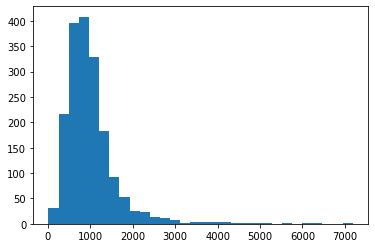

train_tar_max_len : 468


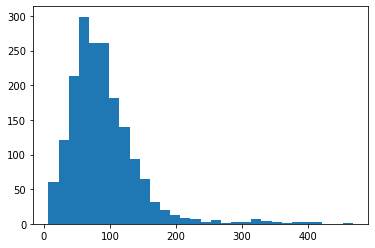

In [ ]:
train_src_len = []
for m in train_src:
    m_len = len(m.split(' '))
    train_src_len.append(m_len)
print('train_src_max_len :', max(train_src_len))
plt.hist(train_src_len, bins=30)
plt.show()

train_tar_len = []
for m in train_tar:
    m_len = len(m.split(' '))
    train_tar_len.append(m_len)
print('train_tar_max_len :', max(train_tar_len))
plt.hist(train_tar_len, bins=30)
plt.show()

In [ ]:
src_tokenizer.fit(train_src)
tar_tokenizer.fit(train_tar)

100%|██████████| 1813/1813 [00:00<00:00, 38674.97it/s]


In [ ]:
train_src_tokens = src_tokenizer.txt2token(train_src)
# val_src_tokens = src_tokenizer.txt2token(val_src)
test_src_tokens = src_tokenizer.txt2token(test_src)

train_tar_tokens = tar_tokenizer.txt2token(train_tar)
# val_tar_tokens = tar_tokenizer.txt2token(val_tar)

100%|██████████| 1813/1813 [00:00<00:00, 36180.50it/s]


In [ ]:
input_vocab_size = len(src_tokenizer.txt2idx)
target_vocab_size = len(tar_tokenizer.txt2idx)

In [ ]:
input_vocab_size, target_vocab_size

(20002, 11649)

In [ ]:
train.summary.iloc[0]

'이유는  말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보다 더 끈질기고 퇴치가 어렵거든요. 또 말라리아 기생충은 한 사람이 여러 번 감염될 정도로 사람의 면역체계를 피해가는 능력이 뛰어나다고. 하지만 한 영국 제약사가 30년 동안 연구한 끝에 백신 개발에 성공해 2019년부터 가나·케냐 등에서 어린이 약 80만 명에게 시범으로 백신을 맞혔어요 . '

In [ ]:
train_tar_tokens[0], tar_tokenizer.convert(train_tar_tokens[0])

(array([  12,  169,   11, 4813,   11, 1730,    4, 6503,   26,  136,    5,
          97,  100,  277,  436,    7, 4814,    9,  126, 1405,  170,   54,
        6504,   10, 6505,    7,  680,   89,    2,  215, 4813, 1730,   18,
          94,   47,    4,  413,  153,  368,  260,  238,   20,   47,   17,
        1177, 2476,    8, 1178,  681,    9, 2020,    4, 4815,  114,    2,
         107,   94,  320, 3860,    7,  325,   36,  230, 1116,   95,  494,
           6,  171,  495,    6, 1250,   85,  707,   36,  101,  254, 1117,
          51, 6506,   61,   19, 1406,  151,  929,  119,   69,  131, 3861,
          23,  171,    3, 3862,   14,    2,   13,    0,    0,    0,    0,
           0]),
 ' 이유는 말라리아는 기생충이 주범 이라 , 코로나 19처럼 바이러스가 퍼뜨리는 다른 병보다 더 끈질기고 퇴치가 어렵거든요. 또 말라리아 기생충은 한 사람이 여러 번 감염될 정도로 사람의면역 체계를 피해 가는 능력이 뛰어나다고. 하지만 한 영국 제약사가 30 년 동안 연구한 끝에 백신 개발에 성공해 2019 년부터 가나 · 케냐 등에서 어린이 약 80 만 명에게 시범으로 백신을 맞혔어요.')

# 데이터셋

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, src_tokens, tar_tokens, mode='train'):
        self.mode = mode
        self.src_tokens = src_tokens
        if self.mode == 'train':
            self.tar_tokens = tar_tokens
            
    def __len__(self):
        return len(self.src_tokens)
    
    def __getitem__(self, i):
        src_token = self.src_tokens[i]
        if self.mode == 'train':
            tar_token = self.tar_tokens[i]
            return {
                'src_token' : torch.tensor(src_token, dtype=torch.long),
                'tar_token' : torch.tensor(tar_token, dtype=torch.long),
            }
        else:
            return {
                'src_token' : torch.tensor(src_token, dtype=torch.long)
            }

In [ ]:
train_dataset = CustomDataset(train_src_tokens, train_tar_tokens)
# val_dataset = CustomDataset(val_src_tokens, val_tar_tokens)
test_dataset = CustomDataset(test_src_tokens, None, 'test')

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=1, shuffle=True)
# val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=1, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=1, shuffle=False)

# 모델 Transformer

https://www.tensorflow.org/text/tutorials/transformer 를 pytorch코드로 수정하여 작성하였습니다.

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return torch.tensor(pos_encoding, dtype=torch.float32)

In [ ]:
def create_padding_mask(seq):
    seq = torch.tensor(torch.eq(seq, 0), dtype=torch.float32)

    # add extra dimensions to add the padding
    # to the attention logits.
    seq = seq.unsqueeze(1).unsqueeze(2)
    return seq  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
    mask = torch.ones(size, size).triu(diagonal=1)
    return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = torch.matmul(q, torch.transpose(k, -2, -1))  # (..., seq_len_q, seq_len_k)
    
    # scale matmul_qk
    dk = k.size()[-1]
    scaled_attention_logits = matmul_qk / math.sqrt(dk)
    
    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = torch.nn.functional.softmax(scaled_attention_logits, dim=-1)  # (..., seq_len_q, seq_len_k)

    output = torch.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [ ]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
    print('Attention weights are:')
    print(temp_attn)
    print('Output is:')
    print(temp_out)

In [ ]:
np.set_printoptions(suppress=True)

temp_k = torch.tensor([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=torch.float32)  # (4, 3)

temp_v = torch.tensor([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=torch.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = torch.tensor([[0, 10, 0]], dtype=torch.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

In [ ]:
temp_q = torch.tensor([[10, 10, 0]], dtype=torch.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

In [ ]:
temp_q = torch.tensor([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=torch.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = nn.Linear(d_model, d_model)
        self.wk = nn.Linear(d_model, d_model)
        self.wv = nn.Linear(d_model, d_model)

        self.wo = nn.Linear(d_model, d_model)
        
    def forward(self, v, k, q, mask):
        batch_size = q.size()[0]
        
        q = self.wq(q).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        k = self.wk(k).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        v = self.wv(v).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        
        scaled_attention = scaled_attention.transpose(1,2).contiguous().view(batch_size, -1, self.num_heads * self.depth)
                
        output = self.wo(scaled_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = torch.rand(1, 60, 512)  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

In [ ]:
class FFN(nn.Module):
    def __init__(self, d_model, dff):
        super(FFN, self).__init__()
        self.layer1 = nn.Linear(d_model, dff)
        self.activation = nn.ReLU()
        self.fc = nn.Linear(dff, d_model)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.fc(x)

        return x

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, maximum_position_encoding, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = FFN(d_model, dff)
        
        self.layernorm1 = nn.LayerNorm([maximum_position_encoding, d_model])
        self.layernorm2 = nn.LayerNorm([maximum_position_encoding, d_model])
        
        self.dropout1 = nn.Dropout(rate)
        self.dropout2 = nn.Dropout(rate)


    def forward(self, x, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [ ]:
# sample_encoder_layer = EncoderLayer(512, 8, 2048, encoder_len)

# sample_encoder_layer_output = sample_encoder_layer(
#     torch.rand(64, encoder_len, 512), None)

# sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, maximum_position_encoding, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        
        self.ffn = FFN(d_model, dff)
        
        self.dropout1 = nn.Dropout(rate)
        self.dropout2 = nn.Dropout(rate)
        self.dropout3 = nn.Dropout(rate)
        
        self.layernorms1 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])
        self.layernorms2 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])
        self.layernorms3 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])

    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorms1[x.size(1)-1](attn1 + x)
        
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorms2[x.size(1)-1](attn2 + out1)  # (batch_size, target_seq_len, d_model)
        
        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorms3[x.size(1)-1](ffn_output + out2)  # (batch_size, target_seq_len, d_model)
        
        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
# sample_decoder_layer = DecoderLayer(512, 8, 2048, decoder_len)

# sample_decoder_layer_output, _, _ = sample_decoder_layer(
#     torch.rand(64, decoder_len, 512), sample_encoder_layer_output,
#     None, None)

# sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

In [ ]:
def clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for i in range(N)])

In [ ]:
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, device, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model).to(device)
        
        self.dec_layers = clones(EncoderLayer(d_model, num_heads, dff, maximum_position_encoding, rate), num_layers)
        self.dropout = nn.Dropout(rate)

    def forward(self, x, mask, enc_output=None):
        if enc_output == None:
            seq_len = x.size()[1]
            attention_weights = {}
            x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
            x *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))
            x += self.pos_encoding[:, :seq_len, :]
            x = self.dropout(x)
            for i in range(self.num_layers):
                x = self.dec_layers[i](x, mask)
        else:
            x = enc_output
            
        return x

In [ ]:
# sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
#                          dff=2048, input_vocab_size=input_vocab_size,
#                          maximum_position_encoding=encoder_len,
#                          device='cpu')

# temp_input = torch.randint(low=0, high=input_vocab_size, size=(64, encoder_len))

# sample_encoder_output = sample_encoder(temp_input, mask=None, enc_output=None)

# print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

In [ ]:
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, device, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = nn.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model).to(device)
        
        self.dec_layers = clones(DecoderLayer(d_model, num_heads, dff, maximum_position_encoding, rate), num_layers)
        self.dropout = nn.Dropout(rate)
        
    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = x.size()[1]
        attention_weights = {}
        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x)
        
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
            
        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [ ]:
# sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
#                          dff=2048, target_vocab_size=target_vocab_size,
#                          maximum_position_encoding=decoder_len,
#                          device='cpu')

# temp_input = torch.randint(low=0, high=target_vocab_size, size=(64, decoder_len))

# output, attn = sample_decoder(temp_input,
#                               enc_output=sample_encoder_output,
#                               look_ahead_mask=None,
#                               padding_mask=None)

# output.shape, attn['decoder_layer2_block2'].shape

In [ ]:
class Transformer(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, device, rate=0.1):
        super().__init__()
        self.device = device
        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                                 input_vocab_size, pe_input, device, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, device, rate)

        self.final_layer = nn.Linear(d_model, target_vocab_size)

    def forward(self, inputs):
        inp, tar, enc_output = inputs

        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, enc_padding_mask, enc_output)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights, enc_output

    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = create_padding_mask(inp)

        # Used in the 2nd attention block in the decoder.
        # This padding mask is used to mask the encoder outputs.
        dec_padding_mask = create_padding_mask(inp)

        # Used in the 1st attention block in the decoder.
        # It is used to pad and mask future tokens in the input received by
        # the decoder.
        look_ahead_mask = create_look_ahead_mask(tar.size(1))
        dec_target_padding_mask = create_padding_mask(tar)
        look_ahead_mask = torch.maximum(dec_target_padding_mask.to(self.device), look_ahead_mask.to(self.device))

        return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [ ]:
# sample_transformer = Transformer(
#     num_layers=2, d_model=512, num_heads=8, dff=2048,
#     input_vocab_size=input_vocab_size, target_vocab_size=target_vocab_size,
#     pe_input=encoder_len, pe_target=decoder_len, device='cpu')

# temp_input = torch.randint(low=0, high=input_vocab_size, size=(64, encoder_len))
# temp_target = torch.randint(low=0, high=target_vocab_size, size=(64, decoder_len))

# fn_out, _, _ = sample_transformer([temp_input, temp_target, None])

# fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=input_vocab_size,
    target_vocab_size=target_vocab_size,
    pe_input=encoder_len,
    pe_target=decoder_len-1,
    device=device,
    rate=dropout_rate
)

transformer = transformer.to(device)

# 옵티마이저, 손실함수

In [ ]:
optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

## 손실함수 및 평가함수 정의

In [ ]:
def loss_function(real, pred):
    mask = torch.logical_not(torch.eq(real, 0))
    loss_ = criterion(pred.permute(0,2,1), real)
    mask = torch.tensor(mask, dtype=loss_.dtype)
    loss_ = mask * loss_

    return torch.sum(loss_)/torch.sum(mask)

def accuracy_function(real, pred):
    accuracies = torch.eq(real, torch.argmax(pred, dim=2))
    mask = torch.logical_not(torch.eq(real, 0))
    accuracies = torch.logical_and(mask, accuracies)
    accuracies = torch.tensor(accuracies, dtype=torch.float32)
    mask = torch.tensor(mask, dtype=torch.float32)
    
    return torch.sum(accuracies)/torch.sum(mask)

## 학습 정의

In [ ]:
def train_step(batch_item, epoch, batch, training):
    src = batch_item['src_token'].to(device)
    tar = batch_item['tar_token'].to(device)
    
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    if training is True:
        transformer.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output, _, _ = transformer([src, tar_inp, None])
            loss = loss_function(tar_real, output)
        acc = accuracy_function(tar_real, output)
        loss.backward()
        optimizer.step()
        lr = optimizer.param_groups[0]["lr"]
        return loss, acc, round(lr, 10)
    else:
        transformer.eval()
        with torch.no_grad():
            output, _, _ = transformer([src, tar_inp, None])
            loss = loss_function(tar_real, output)
        acc = accuracy_function(tar_real, output)
        return loss, acc

## 학습

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Wed Oct 13 02:02:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |   1641MiB / 16280MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
loss_plot, val_loss_plot = [], []
acc_plot, val_acc_plot = [], []

for epoch in range(epochs):
    gc.collect()
    total_loss, total_val_loss = 0, 0
    total_acc, total_val_acc = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_acc, lr = train_step(batch_item, epoch, batch, training)
        total_loss += batch_loss
        total_acc += batch_acc
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'LR' : lr,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1)),
            'Total ACC' : '{:06f}'.format(total_acc/(batch+1))
        })
    loss_plot.append(total_loss/(batch+1))
    acc_plot.append(total_acc/(batch+1))
    
    # tqdm_dataset = tqdm(enumerate(val_dataloader))
    # training = False
    # for batch, batch_item in tqdm_dataset:
    #     batch_loss, batch_acc = train_step(batch_item, epoch, batch, training)
    #     total_val_loss += batch_loss
    #     total_val_acc += batch_acc
        
    #     tqdm_dataset.set_postfix({
    #         'Epoch': epoch + 1,
    #         'Val Loss': '{:06f}'.format(batch_loss.item()),
    #         'Total Val Loss' : '{:06f}'.format(total_val_loss/(batch+1)),
    #         'Total Val ACC' : '{:06f}'.format(total_val_acc/(batch+1))
    #     })
    # val_loss_plot.append(total_val_loss/(batch+1))
    # val_acc_plot.append(total_val_acc/(batch+1))

227it [01:42,  2.22it/s, Epoch=1, LR=0.0001, Loss=4.004763, Total Loss=5.330980, Total ACC=0.069772]
227it [01:42,  2.22it/s, Epoch=2, LR=0.0001, Loss=6.020473, Total Loss=4.483769, Total ACC=0.148875]
227it [01:42,  2.22it/s, Epoch=3, LR=0.0001, Loss=3.311517, Total Loss=4.136704, Total ACC=0.183182]
227it [01:42,  2.23it/s, Epoch=4, LR=0.0001, Loss=3.499223, Total Loss=3.904147, Total ACC=0.205205]
227it [01:42,  2.22it/s, Epoch=5, LR=0.0001, Loss=4.222202, Total Loss=3.715938, Total ACC=0.224030]
227it [01:42,  2.22it/s, Epoch=6, LR=0.0001, Loss=4.810230, Total Loss=3.543999, Total ACC=0.241201]
227it [01:42,  2.22it/s, Epoch=7, LR=0.0001, Loss=3.858591, Total Loss=3.382108, Total ACC=0.258400]
227it [01:42,  2.22it/s, Epoch=8, LR=0.0001, Loss=3.603583, Total Loss=3.226424, Total ACC=0.276938]
227it [01:42,  2.22it/s, Epoch=9, LR=0.0001, Loss=4.200937, Total Loss=3.075317, Total ACC=0.296152]
227it [01:42,  2.23it/s, Epoch=10, LR=0.0001, Loss=4.286851, Total Loss=2.925008, Total ACC

## 학습 결과

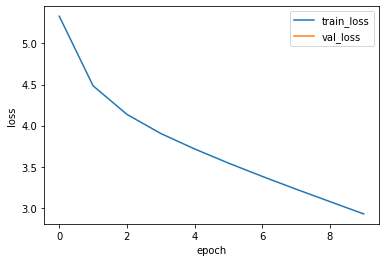

In [ ]:
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

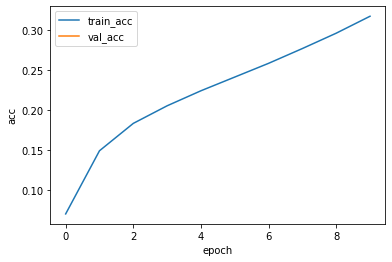

In [ ]:
plt.plot(acc_plot, label='train_acc')
plt.plot(val_acc_plot, label='val_acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

## 추론

In [ ]:
def evaluate(tokens):
    transformer.to(device)
    decoder_input = torch.tensor([tar_tokenizer.txt2idx['sos_']] * tokens.size(0), dtype=torch.long).to(device)
    output = decoder_input.unsqueeze(1).to(device)
    enc_output = None
    for i in range(decoder_len-1):        
        # predictions.shape == (batch_size, seq_len, vocab_size)
        with torch.no_grad():
            predictions, attention_weights, enc_output = transformer([tokens, output, enc_output])
        
        # select the last token from the seq_len dimension
        predictions_ = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
        
        predicted_id = torch.tensor(torch.argmax(predictions_, axis=-1), dtype=torch.int32)
        
        output = torch.cat([output, predicted_id], dim=-1)
    output = output.cpu().numpy()
    
    summary_list = []
    token_list = []
    for token in output:
        summary = tar_tokenizer.convert(token)
        summary_list.append(summary)
        token_list.append(token)
    return summary_list, token_list

In [ ]:
# tqdm_dataset = tqdm(enumerate(val_dataloader))
# preds = []
# tokens = []
# for batch, batch_item in tqdm_dataset:
#     output = evaluate(batch_item['src_token'].to(device))
#     preds.extend(output[0])
#     tokens.extend(output[1])

In [ ]:
# for i, (a, p) in enumerate(zip(df_val.summary, preds)):
#     print('정답 :', a)
#     print('예측 :', p)
#     print('=================================================================================')
#     if i == 10:
#         break

In [ ]:
tqdm_dataset = tqdm(enumerate(test_dataloader))
preds = []
tokens = []
for batch, batch_item in tqdm_dataset:
    output = evaluate(batch_item['src_token'].to(device))
    preds.extend(output[0])
    tokens.extend(output[1])

13it [00:28,  2.16s/it]


In [ ]:
preds

[' + “ 중국은 안 좋다 ” : “ 중국은 중국의힘을 하고 있어요. ”는 중국에 중국을 받을 수 있기 때문에 , 중국이 중국을 받기 때문에는 “ 중국은 “ 중국을 하고 있어요. ”는 중국이 중국을 받고 있었던 중국 정부가 중국을 받고 , 중국에 “ 중국이 중국에 중국에 중국에 , 중국을 하는 사람 들이 중국을 받지 않',
 ' + 미국에서는 : 중국이 중국을 하고 있어요. 중국은 중국이 중국에 중국에 중국에 중국이 중국을 하고 있어요. 중국은 중국이 중국에 중국에 중국의중국이 중국을 하고 있어요. 중국은 중국에 중국에 중국의중국이 중국에 중국의중국에 중국이 중국이 중국을 하고 있어요. 중국은 중국에 중국에 중국의중국에 중국을 하고 , 중국에 중국은 중',
 ' + 우리 나라는 : “ 우리 나라는 없어 ”라고 말하는 사람 들이 되겠다고했지만 , 우리 나라는 “ 우리 나라가 없다 ”라고했어요. 하지만 이번에는 ‘ 우리 나라 ’을 하는 사람 들이 있는 사람 들이 있는 사람 들이 있는 것. 하지만 이번에는 “ 우리 나라가 없다 ”는 “ 우리 나라가 없다 ”라고했지만 , 우리 나라는 “ 우리 나라가 없',
 ' + 우리 나라는 : “ 우리 나라는 없다 ”는 “ 우리 나라에는 없다 ”는 말을 하는 것 같은 사람 들이 있는 것. 하지만 이번에는 “ 우리 나라에서는 “ 우리 나라가 없다 ”라고 말하는 것 같아요. ”는 “ 우리 나라가 없다 ”는 말이 더 많이 안 좋아 주는 것 같아요. ”라고했지만 , 이번에는 “ 우리 나라에도 없다 ',
 ' + 미국에서는 : 미국에서는 ‘ 우리 나라 ’이라고도 하는 사람이 많은 사람 들이 있어요. 하지만 중국은 “ 우리 나라는 없다 ”는 ‘ 위안부 ’의‘ 위안부 ’ 이라는 용어 ’ 이라는 말이 있어요. 하지만 이번에 , 우리 나라에서도 있어요. 하지만 중국은 “ 우리 나라가 없다 ”는 ‘ 위안부 ’ 이라는 것을 하고 , 중국의‘ 위안부 ’에도 있어요. 하지만 이',
 ' + 우리 나라는 : “ 우리 나라는 우리 나라가 없다 ”라고 말하